In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To display plots inside the notebook
%matplotlib inline

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [3]:
df = pd.read_csv("googleplaystore.csv")
df.head()  # Show the first 5 rows


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
df.isnull().sum()


App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [6]:
df[df['Rating'] > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [7]:
def convert_to_bytes(size):
    if isinstance(size, str):
        size = size.strip()
        if size == 'Varies with device':
            return np.nan
        elif size.endswith('M'):
            return float(size.replace('M', '')) * 1024 * 1024
        elif size.endswith('k'):
            return float(size.replace('k', '')) * 1024
    return np.nan

df['Size'] = df['Size'].apply(convert_to_bytes)


In [8]:
df['Size_MB'] = df['Size'] / (1024 * 1024)


In [9]:
df[['Size', 'Size_MB']].head()


,Size,Size_MB
0,19922944.0,19.0
1,14680064.0,14.0
2,9122611.2,8.7
3,26214400.0,25.0
4,2936012.8,2.8


In [24]:
# Remove '+' and ',' then convert to int
df['Installs'] = df['Installs'].str.replace('+', '', regex=False)
df['Installs'] = df['Installs'].str.replace(',', '', regex=False)
df['Installs'] = df['Installs'].astype(int)


In [25]:
bins = [-1, 0, 10, 1000, 10000, 100000, 1000000, 10000000, 10000000000]
labels = ['no', 'Very Low', 'Low', 'Moderate', 'More than Moderate', 'High', 'Very High', 'Top Notch']

df['Installs_category'] = pd.cut(df['Installs'], bins=bins, labels=labels)


In [13]:
df['Installs'].value_counts(dropna=False).head(20)


Installs
1000000       1579
10000000      1252
100000        1169
10000         1054
1000           907
5000000        752
100            719
500000         539
50000          479
5000           477
100000000      409
10             386
500            330
50000000       289
50             205
5               82
500000000       72
1               67
1000000000      58
0               15
Name: count, dtype: int64

In [14]:
df[~df['Installs'].str.replace(',', '').str.replace('+', '').str.isnumeric()]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_MB
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,NaN,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN,NaN


In [15]:
df[df['Rating'] > 5]  # Check invalid ratings
df = df[df['Rating'] <= 5]  # Remove them


In [16]:
df.shape


(9366, 14)

1. Distribution of App Ratings

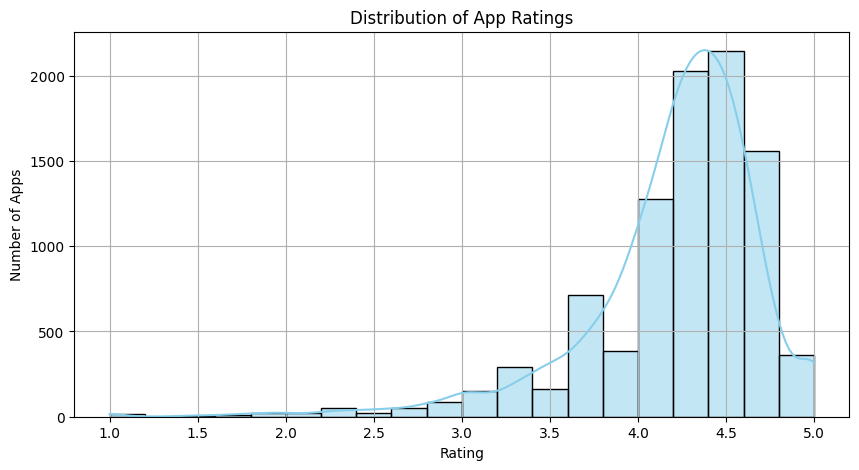

In [26]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Rating'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Apps')
plt.grid(True)
plt.show()


2. Count of Apps by Category

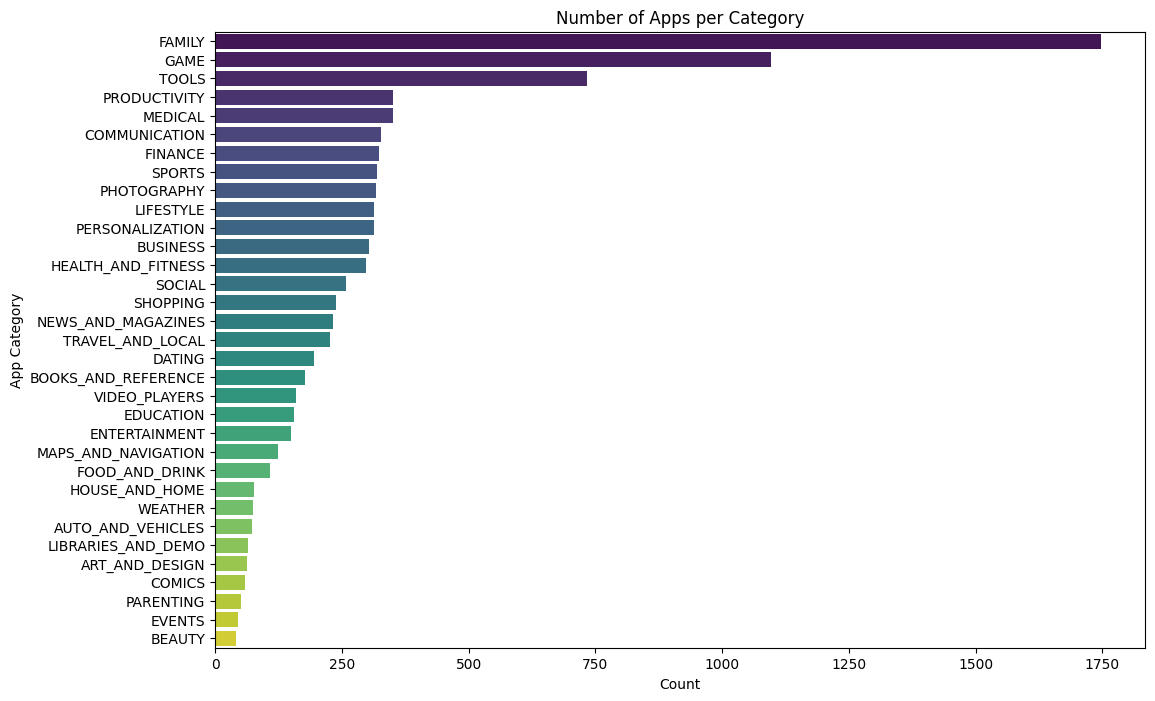

In [27]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, y='Category', order=df['Category'].value_counts().index, palette='viridis')
plt.title('Number of Apps per Category')
plt.xlabel('Count')
plt.ylabel('App Category')
plt.show()


 3. Scatter Plot: Installs vs. Ratings

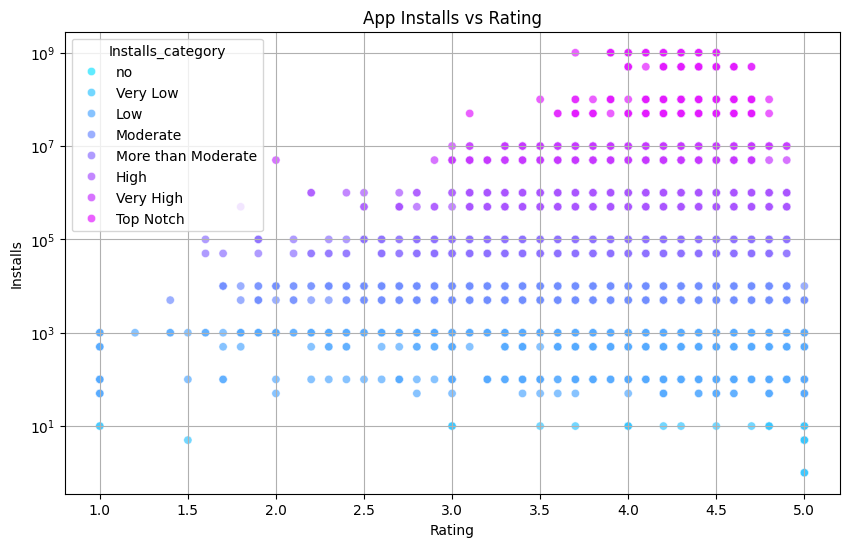

In [28]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Rating', y='Installs', hue='Installs_category', palette='cool', alpha=0.7)
plt.title('App Installs vs Rating')
plt.xlabel('Rating')
plt.ylabel('Installs')
plt.yscale('log')  # Use log scale for better spread
plt.grid(True)
plt.show()


4. Box Plot: Reviews by Install Category

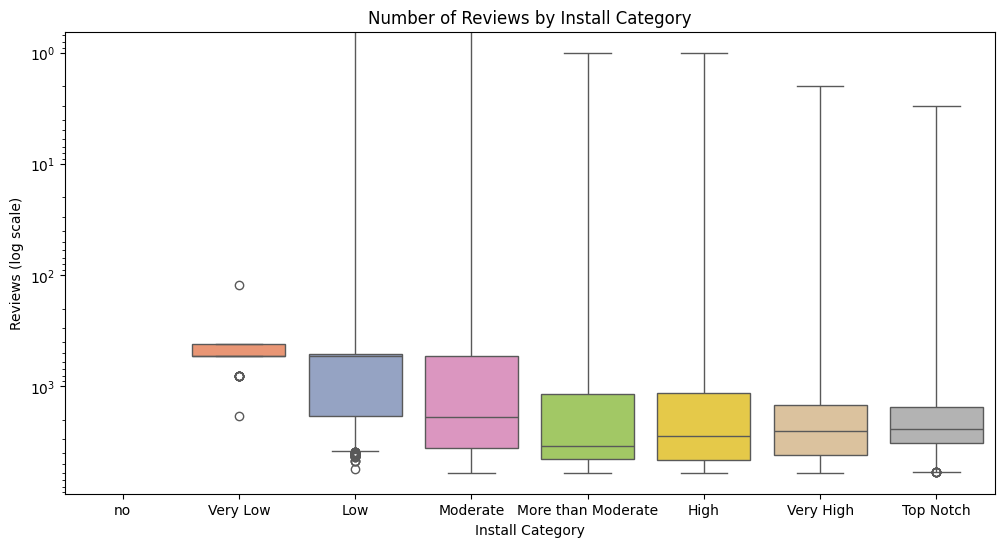

In [29]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Installs_category', y='Reviews', palette='Set2')
plt.yscale('log')  # Log scale to handle large review range
plt.title('Number of Reviews by Install Category')
plt.xlabel('Install Category')
plt.ylabel('Reviews (log scale)')
plt.show()


5. Correlation Heatmap

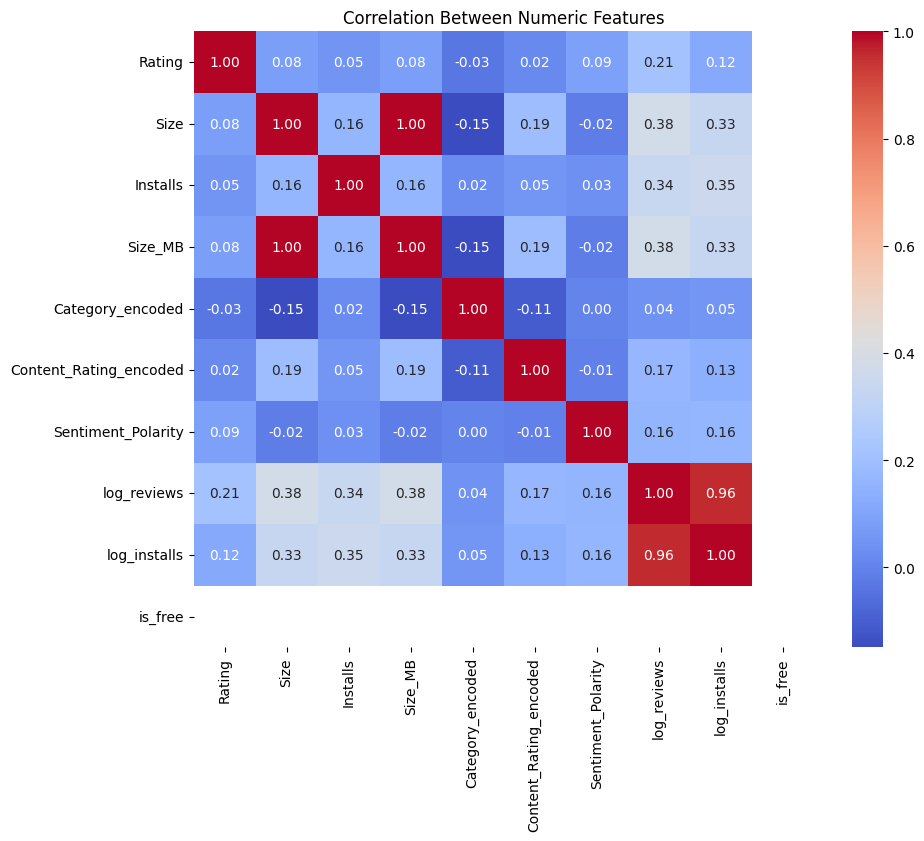

In [30]:
# Select only numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Numeric Features')
plt.show()


Most Apps per Category

Top 10 categories by number of apps:
Category
FAMILY           1747
GAME             1097
TOOLS             734
PRODUCTIVITY      351
MEDICAL           350
COMMUNICATION     328
FINANCE           323
SPORTS            319
PHOTOGRAPHY       317
LIFESTYLE         314
Name: count, dtype: int64


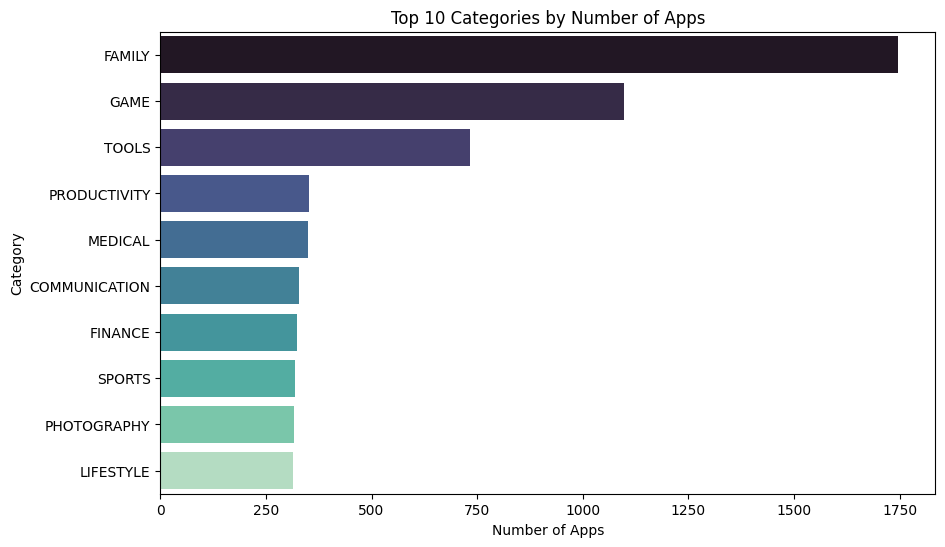

In [31]:
top_categories = df['Category'].value_counts().head(10)
print("Top 10 categories by number of apps:")
print(top_categories)

# Optional visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=top_categories.values, y=top_categories.index, palette='mako')
plt.title('Top 10 Categories by Number of Apps')
plt.xlabel('Number of Apps')
plt.ylabel('Category')
plt.show()


Most Installs per Category

Top 10 categories by total installs:
Category
GAME                  35085862717
COMMUNICATION         32647241530
PRODUCTIVITY          14176070180
SOCIAL                14069841475
TOOLS                 11450724500
FAMILY                10257701590
PHOTOGRAPHY           10088243130
NEWS_AND_MAGAZINES     7496210650
TRAVEL_AND_LOCAL       6868859300
VIDEO_PLAYERS          6221897200
Name: Installs, dtype: int64


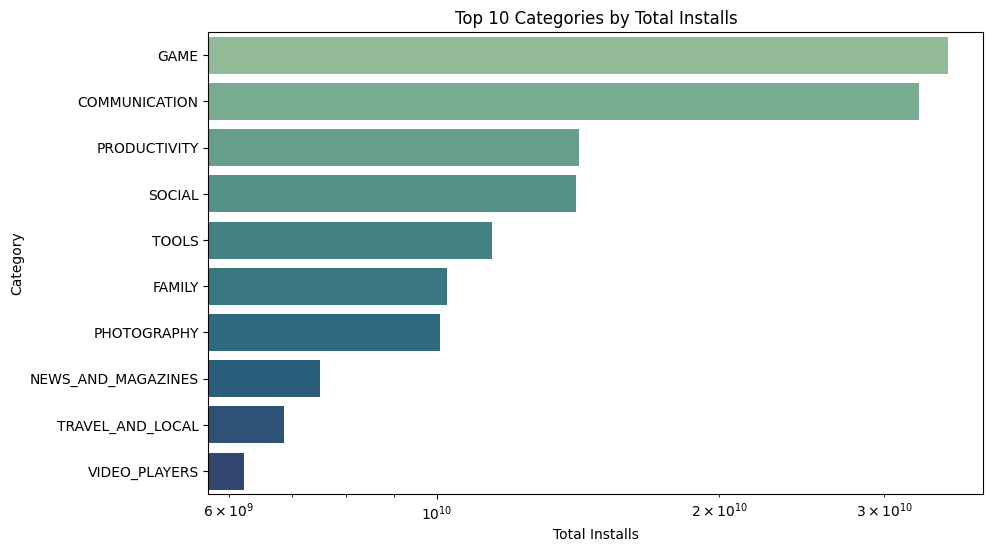

In [32]:
installs_by_category = df.groupby('Category')['Installs'].sum().sort_values(ascending=False).head(10)
print("Top 10 categories by total installs:")
print(installs_by_category)

plt.figure(figsize=(10, 6))
sns.barplot(x=installs_by_category.values, y=installs_by_category.index, palette='crest')
plt.title('Top 10 Categories by Total Installs')
plt.xlabel('Total Installs')
plt.ylabel('Category')
plt.xscale('log')  # Log scale due to large numbers
plt.show()


Most Reviews per Category

Top 10 categories by total reviews:
Category
PARENTING              8617941361414133937891075594976449293623861621...
SOCIAL                 7815830666577313860625949173295532622492170147...
MAPS_AND_NAVIGATION    7232629156815348110480050459432695644349284201...
EDUCATION              6289924181893254485375314299977032346407510611...
COMMUNICATION          5664284769119316125257964299514290354604324341...
ENTERTAINMENT          5456208116562894829677147008910939985095241225...
SPORTS                 5211381802283662828824597951338259119951733342...
FAMILY                 4706944214544499101477412753339832026757611161...
GAME                   4447388277222642242667725425814889736920352341...
HEALTH_AND_FITNESS     4281561577380983113927233722012540059220098117...
Name: Reviews, dtype: object


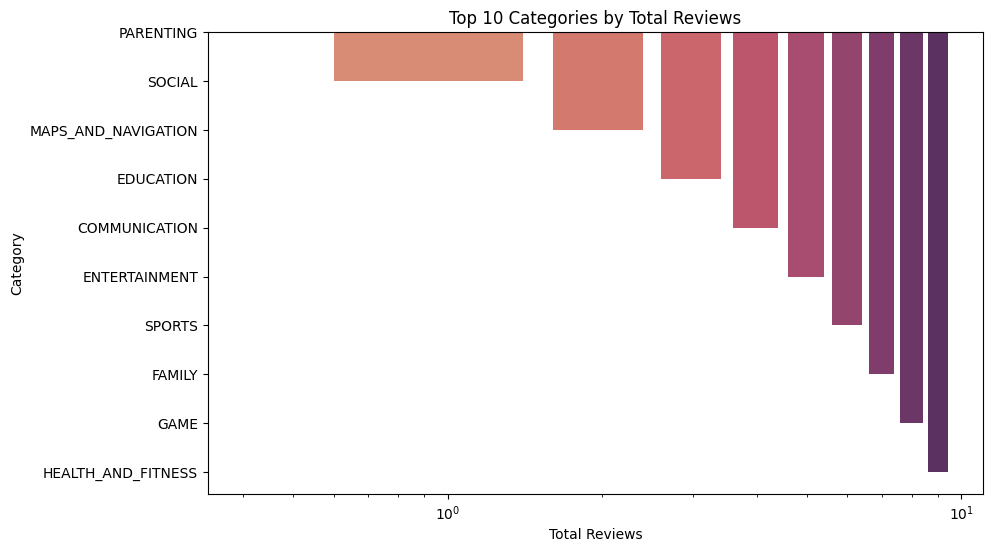

In [33]:
reviews_by_category = df.groupby('Category')['Reviews'].sum().sort_values(ascending=False).head(10)
print("Top 10 categories by total reviews:")
print(reviews_by_category)

plt.figure(figsize=(10, 6))
sns.barplot(x=reviews_by_category.values, y=reviews_by_category.index, palette='flare')
plt.title('Top 10 Categories by Total Reviews')
plt.xlabel('Total Reviews')
plt.ylabel('Category')
plt.xscale('log')
plt.show()


Highest Average Rating by Category

Top 10 categories by average rating:
Category
EVENTS                 4.435556
EDUCATION              4.389032
ART_AND_DESIGN         4.358065
BOOKS_AND_REFERENCE    4.346067
PERSONALIZATION        4.335987
PARENTING              4.300000
GAME                   4.286326
BEAUTY                 4.278571
HEALTH_AND_FITNESS     4.277104
SHOPPING               4.259664
Name: Rating, dtype: float64


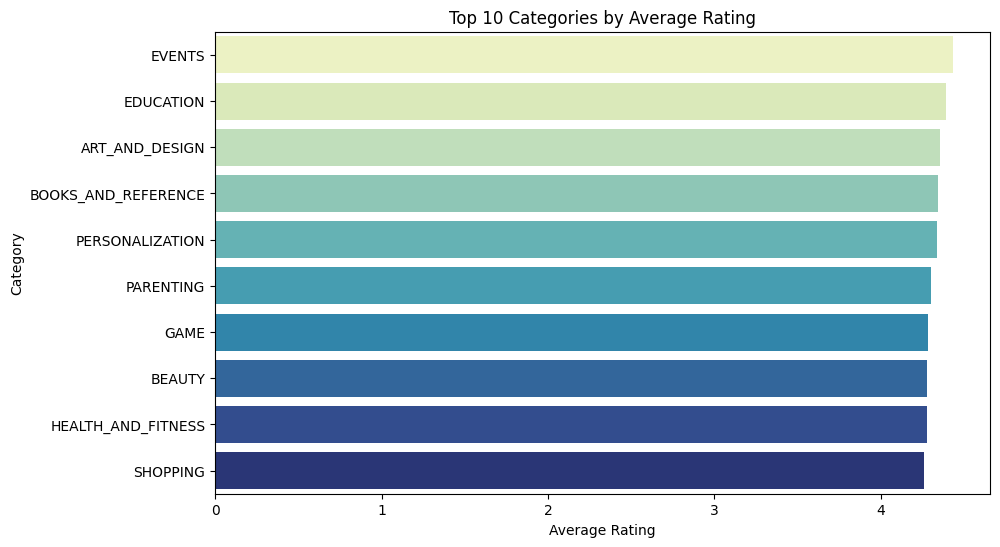

In [34]:
avg_rating_by_category = df.groupby('Category')['Rating'].mean().sort_values(ascending=False).head(10)
print("Top 10 categories by average rating:")
print(avg_rating_by_category)

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_rating_by_category.values, y=avg_rating_by_category.index, palette='YlGnBu')
plt.title('Top 10 Categories by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Category')
plt.show()


In [35]:

df_reviews = pd.read_csv("googleplaystore_user_reviews.csv")

df_reviews.head()


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [36]:

df_reviews = pd.read_csv("googleplaystore_user_reviews.csv")


print("Missing values before filling:")
print(df_reviews.isnull().sum())


df_reviews['Translated_Review'] = df_reviews['Translated_Review'].fillna("No Review")


df_reviews['Sentiment'] = df_reviews['Sentiment'].fillna("Neutral")


df_reviews['Sentiment_Polarity'] = df_reviews['Sentiment_Polarity'].fillna(0.0)
df_reviews['Sentiment_Subjectivity'] = df_reviews['Sentiment_Subjectivity'].fillna(0.0)


duplicate_count = df_reviews.duplicated().sum()
print(f"\nDuplicate rows in dataset: {duplicate_count}")



Missing values before filling:
App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

Duplicate rows in dataset: 33619


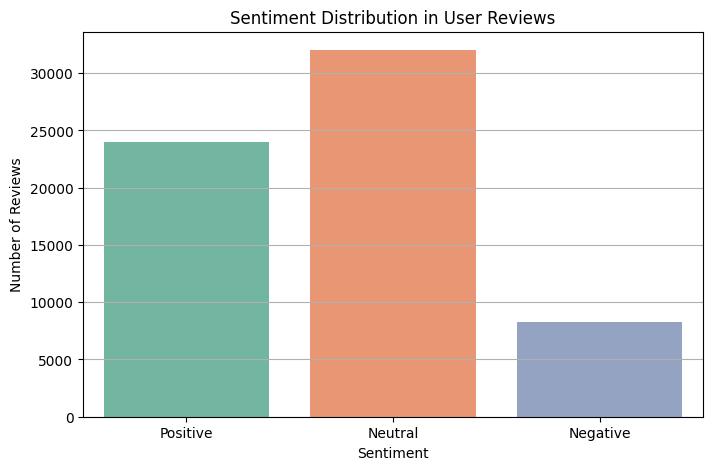

In [37]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df_reviews, x='Sentiment', palette='Set2')
plt.title('Sentiment Distribution in User Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.grid(axis='y')
plt.show()


In [38]:
df_reviews.groupby('Sentiment')['Sentiment_Polarity'].mean()


Sentiment
Negative   -0.256173
Neutral     0.000000
Positive    0.372402
Name: Sentiment_Polarity, dtype: float64

In [39]:

top_positive_apps = df_reviews[df_reviews['Sentiment'] == 'Positive']['App'].value_counts().head(5)
print("Top 5 Apps with Most Positive Reviews:\n", top_positive_apps)

top_negative_apps = df_reviews[df_reviews['Sentiment'] == 'Negative']['App'].value_counts().head(5)
print("\nTop 5 Apps with Most Negative Reviews:\n", top_negative_apps)


Top 5 Apps with Most Positive Reviews:
 App
Helix Jump                        209
Duolingo: Learn Languages Free    200
Calorie Counter - Macros          174
Calorie Counter - MyFitnessPal    169
Bowmasters                        169
Name: count, dtype: int64

Top 5 Apps with Most Negative Reviews:
 App
Angry Birds Classic      147
Candy Crush Saga         126
Bowmasters               119
8 Ball Pool              106
Candy Crush Soda Saga     96
Name: count, dtype: int64


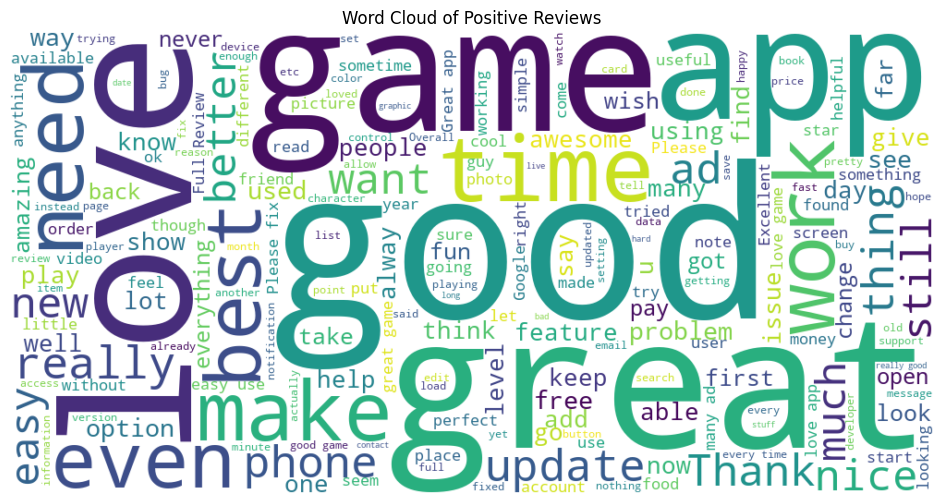

In [40]:
from wordcloud import WordCloud

positive_text = " ".join(df_reviews[df_reviews['Sentiment'] == 'Positive']['Translated_Review'])

wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(positive_text)

plt.figure(figsize=(15, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Positive Reviews')
plt.show()


In [41]:
pip install wordcloud


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\acer\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [42]:
# Merge main dataset (df) with user reviews (df_reviews)
merged_df = pd.merge(df, df_reviews, on='App', how='left')

# Check the result
merged_df.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,Content_Rating_encoded,Sentiment_Polarity_x,log_reviews,log_installs,is_free,Installs_category,Translated_Review,Sentiment,Sentiment_Polarity_y,Sentiment_Subjectivity
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,10000,Free,0,Everyone,Art & Design,...,1,0.000000,5.075174,9.210440,0,Moderate,NaN,NaN,NaN,NaN
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,500000,Free,0,Everyone,Art & Design;Pretend Play,...,1,0.115805,6.875232,13.122365,0,High,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,500000,Free,0,Everyone,Art & Design;Pretend Play,...,1,0.115805,6.875232,13.122365,0,High,It bad >:(,Negative,-0.725,0.833333
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,500000,Free,0,Everyone,Art & Design;Pretend Play,...,1,0.115805,6.875232,13.122365,0,High,like,Neutral,0.000,0.000000
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,500000,Free,0,Everyone,Art & Design;Pretend Play,...,1,0.115805,6.875232,13.122365,0,High,No Review,Neutral,0.000,0.000000


In [43]:
merged_df.isnull().sum()


App                           0
Category                      0
Rating                        0
Reviews                       0
Size                      48348
Installs                      0
Type                          0
Price                         0
Content Rating                0
Genres                        0
Last Updated                  0
Current Ver                   4
Android Ver                   2
Size_MB                   48348
Category_encoded              0
Content_Rating_encoded        0
Sentiment_Polarity_x          0
log_reviews                   0
log_installs                  0
is_free                       0
Installs_category             0
Translated_Review          7835
Sentiment                  7835
Sentiment_Polarity_y       7835
Sentiment_Subjectivity     7835
dtype: int64

In [44]:
merged_df.groupby('Sentiment')['Rating'].mean()


Sentiment
Negative    4.326674
Neutral     4.298236
Positive    4.351265
Name: Rating, dtype: float64

In [45]:
df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce')


In [46]:
df['Updated_Year'] = df['Last Updated'].dt.year
df['Updated_Month'] = df['Last Updated'].dt.month


Number of Apps Updated per Year

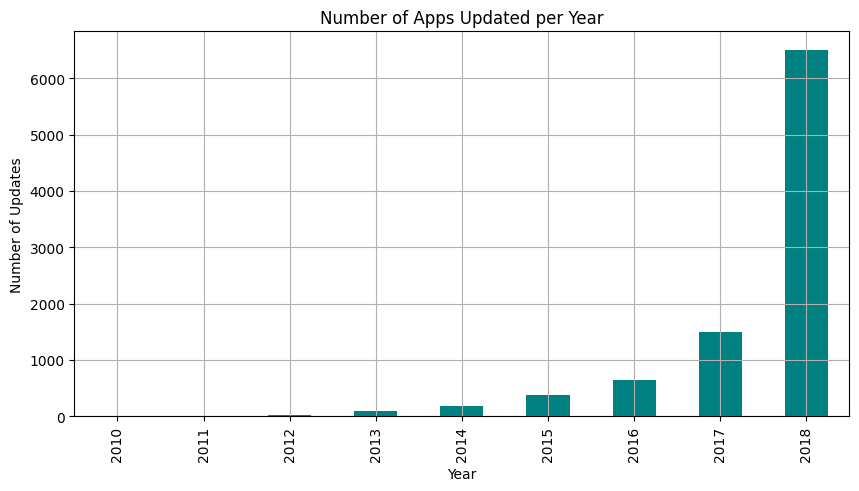

In [47]:
plt.figure(figsize=(10, 5))
df['Updated_Year'].value_counts().sort_index().plot(kind='bar', color='teal')
plt.title('Number of Apps Updated per Year')
plt.xlabel('Year')
plt.ylabel('Number of Updates')
plt.grid(True)
plt.show()


Average Rating by Year of Update

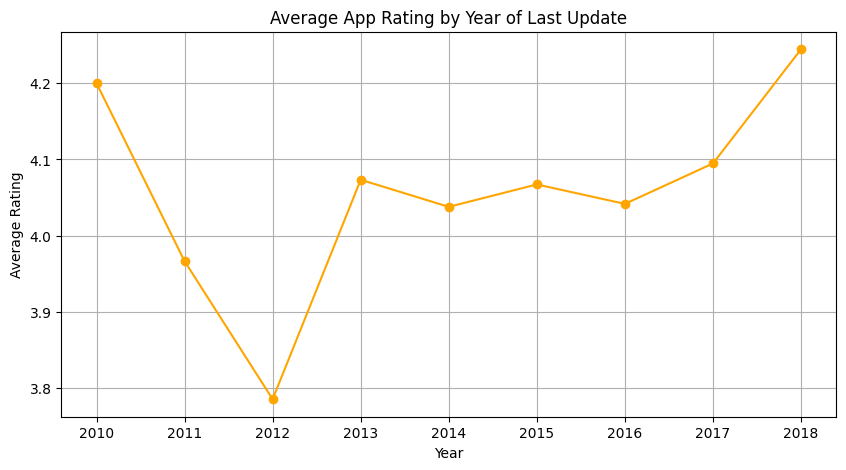

In [48]:
rating_by_year = df.groupby('Updated_Year')['Rating'].mean()

plt.figure(figsize=(10, 5))
rating_by_year.plot(marker='o', color='orange')
plt.title('Average App Rating by Year of Last Update')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()


In [49]:
recent_apps = df[df['Updated_Year'] >= 2020]
print("Number of apps updated in 2020 or later:", recent_apps.shape[0])


Number of apps updated in 2020 or later: 0


In [50]:
# Features and target
features = ['Category', 'Reviews', 'Size_MB', 'Installs', 'Price', 'Content Rating', 'Genres']
target = 'Rating'

df_model = df[features + [target]].copy()


In [51]:
# Fill missing values
df_model['Size_MB'] = df_model['Size_MB'].fillna(df_model['Size_MB'].median())
df_model['Rating'] = df_model['Rating'].fillna(df_model['Rating'].mean())
df_model['Price'] = df_model['Price'].fillna(0)
df_model['Reviews'] = df_model['Reviews'].fillna(0)
df_model['Installs'] = df_model['Installs'].fillna(0)

# Drop rows with missing category/content/genre (few rows only)
df_model.dropna(subset=['Category', 'Content Rating', 'Genres'], inplace=True)


In [52]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in ['Category', 'Content Rating', 'Genres']:
    df_model[col] = le.fit_transform(df_model[col])


In [53]:
from sklearn.model_selection import train_test_split

X = df_model.drop('Rating', axis=1)
y = df_model['Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [54]:
# Remove dollar signs and convert to float
df_model['Price'] = df_model['Price'].replace('[\$,]', '', regex=True).astype(float)


In [55]:
# Step 1: Work on a fresh copy of your modeling DataFrame
df_model = df[['Category', 'Reviews', 'Size_MB', 'Installs', 'Price', 'Content Rating', 'Genres', 'Rating']].copy()

# Step 2: Clean Price column (remove '$' and convert to float)
df_model['Price'] = df_model['Price'].astype(str).str.replace('$', '', regex=False).astype(float)

# Step 3: Fill/clean other features
df_model['Size_MB'] = df_model['Size_MB'].fillna(df_model['Size_MB'].median())
df_model['Rating'] = df_model['Rating'].fillna(df_model['Rating'].mean())
df_model['Reviews'] = df_model['Reviews'].fillna(0)
df_model['Installs'] = df_model['Installs'].fillna(0)

# Step 4: Drop rows with missing categories, content rating or genres
df_model.dropna(subset=['Category', 'Content Rating', 'Genres'], inplace=True)

# Step 5: Encode categorical columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in ['Category', 'Content Rating', 'Genres']:
    df_model[col] = le.fit_transform(df_model[col])

# Step 6: Train/test split
from sklearn.model_selection import train_test_split
X = df_model.drop('Rating', axis=1)
y = df_model['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Train model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 8: Evaluate
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(X_test)
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred):.2f}")


Mean Squared Error: 0.22
R² Score: 0.10


In [56]:
pip install xgboost


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\acer\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [57]:
from sklearn.preprocessing import LabelEncoder

# Make a clean copy of modeling data
df_model = df[['Category', 'Reviews', 'Size_MB', 'Installs', 'Price', 'Content Rating', 'Genres', 'Rating']].copy()

# Convert numeric columns (that may be string) to proper types
df_model['Price'] = df_model['Price'].astype(str).str.replace('$', '', regex=False).astype(float)
df_model['Reviews'] = df_model['Reviews'].astype(str).str.replace(',', '', regex=False).astype(float)
df_model['Installs'] = df_model['Installs'].astype(str).str.replace('+', '', regex=False).str.replace(',', '', regex=False).astype(float)

# Fill missing numerical values
df_model['Size_MB'] = df_model['Size_MB'].fillna(df_model['Size_MB'].median())
df_model['Rating'] = df_model['Rating'].fillna(df_model['Rating'].mean())

# Drop rows with missing categorical columns
df_model.dropna(subset=['Category', 'Content Rating', 'Genres'], inplace=True)

# Encode categorical columns
le = LabelEncoder()
for col in ['Category', 'Content Rating', 'Genres']:
    df_model[col] = le.fit_transform(df_model[col])

# Split X and y
X = df_model.drop('Rating', axis=1)
y = df_model['Rating']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [58]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_xgb = xgb_model.predict(X_test)
print(f"XGBoost MSE: {mean_squared_error(y_test, y_pred_xgb):.2f}")
print(f"XGBoost R² Score: {r2_score(y_test, y_pred_xgb):.2f}")


XGBoost MSE: 0.21
XGBoost R² Score: 0.14


In [61]:
# Load the user reviews dataset
df_reviews = pd.read_csv('googleplaystore_user_reviews.csv')

# Handle missing sentiment polarity
df_reviews['Sentiment_Polarity'] = pd.to_numeric(df_reviews['Sentiment_Polarity'], errors='coerce')
df_reviews['Sentiment_Polarity'] = df_reviews['Sentiment_Polarity'].fillna(0)

# Group by App and calculate average polarity
avg_sentiment = df_reviews.groupby('App')['Sentiment_Polarity'].mean().reset_index()

# Merge with the main df
df = df.merge(avg_sentiment, on='App', how='left')

# Fill missing sentiment values with 0
df['Sentiment_Polarity'] = df['Sentiment_Polarity'].fillna(0)


In [60]:
# Convert 'Reviews' and 'Installs' to numeric (if not already)
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')


In [62]:
import numpy as np

# Log transformations (use +1 to avoid log(0))
df['log_reviews'] = np.log1p(df['Reviews'].astype(float))
df['log_installs'] = np.log1p(df['Installs'].astype(float))

# Binary feature: is the app free?
df['is_free'] = (df['Price'] == 0).astype(int)

# Review rate: Reviews per Install
df['review_rate'] = df['Reviews'] / (df['Installs'] + 1)


In [63]:
features = ['Category_encoded', 'Reviews', 'Installs', 'Price', 'Content_Rating_encoded',
            'Sentiment_Polarity', 'log_reviews', 'log_installs', 'is_free', 'review_rate']

X = df[features]
y = df['Rating']


In [17]:
from sklearn.preprocessing import LabelEncoder

# Create label encoders
le_cat = LabelEncoder()
le_content = LabelEncoder()

# Encode Category and Content Rating
df['Category_encoded'] = le_cat.fit_transform(df['Category'].astype(str))
df['Content_Rating_encoded'] = le_content.fit_transform(df['Content Rating'].astype(str))


In [64]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Features to use (including new ones)
features = ['Category_encoded', 'Reviews', 'Installs', 'Price', 'Content_Rating_encoded',
            'Sentiment_Polarity', 'log_reviews', 'log_installs', 'is_free', 'review_rate']

# Define X and y
X = df[features]
y = df['Rating']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = xgb_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", round(mse, 2))
print("R² Score:", round(r2, 2))


Mean Squared Error: 0.22
R² Score: 0.1


In [66]:
# Create rating categories
def categorize_rating(rating):
    if rating >= 4.5:
        return 'High'
    elif rating >= 3.5:
        return 'Medium'
    else:
        return 'Low'

df['Rating_Category'] = df['Rating'].apply(categorize_rating)
print(df['Rating_Category'].value_counts())


Rating_Category
Medium    5678
High      2955
Low        733
Name: count, dtype: int64


In [67]:
# Redefine X and y
y_class = df['Rating_Category']
X_class = df[features]  # You already defined this earlier


In [68]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_class, y_class, test_size=0.2, random_state=42)


In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.6622198505869797

Classification Report:
               precision    recall  f1-score   support

        High       0.59      0.55      0.57       616
         Low       0.26      0.17      0.20       133
      Medium       0.72      0.78      0.75      1125

    accuracy                           0.66      1874
   macro avg       0.52      0.50      0.51      1874
weighted avg       0.65      0.66      0.65      1874


Confusion Matrix:
 [[337  21 258]
 [ 31  22  80]
 [200  43 882]]
